In [1]:
import os
import pickle
import numpy as np

from osl_dynamics.data import Data
from osl_dynamics.models.hmm import Config, Model
from osl_dynamics.models.hmm import Model
from osl_dynamics.utils import plotting
from osl_dynamics.inference import modes, metrics
from preproc_funcs import plot_channel_time_series

data = Data("/Users/podlaskijacek/Documents/HMM-Analysis/s_01_preproc-raw.fif")
print(data)
results_dir= f"/Users/podlaskijacek/Documents/HMM-Analysis/resultaty"

Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

Data
 id: 13209139248
 n_sessions: 1
 n_samples: 219094
 n_channels: 340


In [2]:
#PCA

methods = {
    "pca": {"n_pca_components": 64},
    "standardize": {},
}
data.prepare(methods)
print(data)
print(data.pca_components.shape)
print(data)

#plot_channel_time_series(data, savebase=None, exclude_bads=False)

Calculating PCA components:   0%|          | 0/1 [00:00<?, ?it/s]

2026-01-30 10:00:28 INFO osl-dynamics [base.py:711:pca]: Explained variance: 95.9%


PCA:   0%|          | 0/1 [00:00<?, ?it/s]

Standardize:   0%|          | 0/1 [00:00<?, ?it/s]

Data
 id: 13209139248
 n_sessions: 1
 n_samples: 219094
 n_channels: 64
(340, 64)
Data
 id: 13209139248
 n_sessions: 1
 n_samples: 219094
 n_channels: 64


In [ ]:
# Create a config object
config = Config(
    n_states=6,
    n_channels=data.n_channels,
    sequence_length=200, #splits into random sequences for computational purposes, n=200 sequences
    learn_means=False,
    learn_covariances=True,
    batch_size=64,
    learning_rate=0.01,
    n_epochs=20,
)

In [4]:
model = Model(config)
model.summary()

Model: "HMM"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ data (InputLayer)   │ (None, 200, 64)   │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ means               │ (6, 64)           │        384 │ data[0][0]        │
│ (VectorsLayer)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ covs                │ (6, 64, 64)       │     12,480 │ data[0][0]        │
│ (CovarianceMatrice… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ll                  │ (None, 200, 64)   │          0 │ data[0][0],       │
│ (SeparateLogLikeli… │                   │            │ means[0][0],      │
│                     │                   │            │ covs[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hid_state_inf       │ [(None, 200, 64), │         42 │ ll[0][0]          │
│ (HiddenMarkovState… │ (None, 200, 6,    │            │                   │
│                     │ 6)]               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ll_loss             │ (1)               │          0 │ ll[0][0],         │
│ (SumLogLikelihoodL… │                   │            │ hid_state_inf[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 12,906 (50.41 KB)

 Trainable params: 12,522 (48.91 KB)

 Non-trainable params: 384 (1.50 KB)

In [5]:
init_history = model.random_state_time_course_initialization(data, n_epochs=1, n_init=3)
history = model.fit(data)

2026-01-30 10:00:48 INFO osl-dynamics [inf_mod_base.py:1435:random_state_time_course_initialization]: Random state time course initialization
2026-01-30 10:00:48 INFO osl-dynamics [inf_mod_base.py:1451:random_state_time_course_initialization]: Initialization 0
2026-01-30 10:00:48 INFO osl-dynamics [inf_mod_base.py:1491:set_random_state_time_course_initialization]: Setting random means and covariances
2026-01-30 10:00:49.014103: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 162ms/step - ll_loss: 86.8859 - loss: 86.8623 - learning_rate: 0.0100 - rho: 0.2853


2026-01-30 10:01:03 INFO osl-dynamics [inf_mod_base.py:1451:random_state_time_course_initialization]: Initialization 1
2026-01-30 10:01:03 INFO osl-dynamics [inf_mod_base.py:1491:set_random_state_time_course_initialization]: Setting random means and covariances
2026-01-30 10:01:04.574363: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


69/69 ━━━━━━━━━━━━━━━━━━━━ 13s 148ms/step - ll_loss: 86.5339 - loss: 86.5772 - learning_rate: 0.0100 - rho: 0.2853


2026-01-30 10:01:17 INFO osl-dynamics [inf_mod_base.py:1451:random_state_time_course_initialization]: Initialization 2
2026-01-30 10:01:17 INFO osl-dynamics [inf_mod_base.py:1491:set_random_state_time_course_initialization]: Setting random means and covariances


69/69 ━━━━━━━━━━━━━━━━━━━━ 12s 140ms/step - ll_loss: 86.9476 - loss: 86.9814 - learning_rate: 0.0100 - rho: 0.2853


2026-01-30 10:01:30 INFO osl-dynamics [inf_mod_base.py:1477:random_state_time_course_initialization]: Using initialization 1


Epoch 1/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - ll_loss: 83.3459 - loss: 83.3447 - learning_rate: 0.0100 - rho: 0.2853
Epoch 2/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - ll_loss: 82.3842 - loss: 82.3787 - learning_rate: 0.0090 - rho: 0.1866
Epoch 3/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - ll_loss: 82.2587 - loss: 82.2548 - learning_rate: 0.0082 - rho: 0.1436
Epoch 4/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 162ms/step - ll_loss: 81.9660 - loss: 81.9722 - learning_rate: 0.0074 - rho: 0.1187
Epoch 5/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 14s 203ms/step - ll_loss: 81.8133 - loss: 81.7961 - learning_rate: 0.0067 - rho: 0.1022
Epoch 6/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 14s 207ms/step - ll_loss: 81.7036 - loss: 81.6960 - learning_rate: 0.0061 - rho: 0.0904
Epoch 7/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 16s 239ms/step - ll_loss: 81.5405 - loss: 81.5199 - learning_rate: 0.0055 - rho: 0.0814
Epoch 8/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 18s 255ms/step - ll_loss: 81.4359 - loss: 81.4223 - learning_rate: 0.0050 - rho:

In [13]:
model.save("results/model")
from osl_dynamics.models import load

model = load("results/model")
print(model)

2026-01-26 16:48:17 INFO osl-dynamics [mod_base.py:781:load]: Loading model: results/model


In [6]:
# Save model
model_dir = f"{results_dir}/model1"
model.save(model_dir)

In [7]:
import pickle

free_energy = model.free_energy(data)
history["free_energy"] = free_energy
pickle.dump(history, open("results/model/history.pkl", "wb"))

Getting free energy:   0%|          | 0/69 [00:00<?, ?it/s]

2026-01-30 10:08:15.061507: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [12]:
# Inferred state probabilities
alp = model.get_alpha(data)

os.makedirs("results/inf_params/", exist_ok=True)
pickle.dump(alp, open("results/inf_params/alp.pkl", "wb"))

2026-01-30 12:29:25 INFO osl-dynamics [inf_mod_base.py:1151:get_alpha]: Getting alpha


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━

(<Figure size 1200x250 with 2 Axes>, [<Axes: xlabel='Sample'>])

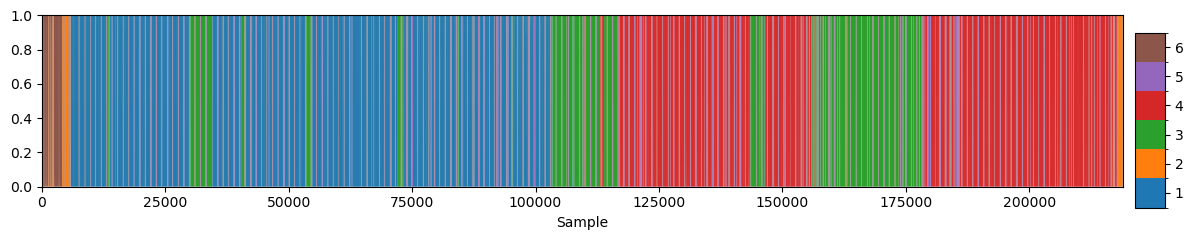

In [13]:
from osl_dynamics.utils import plotting

plotting.plot_alpha(alp)

In [10]:
# Group-level HMM parameters
means, covs = model.get_means_covariances()
initial_state_probs = model.get_initial_state_probs()
trans_prob = model.get_trans_prob()

In [ ]:


# Save
inf_params_dir = f"{results_dir}/inf_params"
os.makedirs(inf_params_dir, exist_ok=True)

pickle.dump(alp, open(f"{inf_params_dir}/alp.pkl", "wb"))
np.save(f"{inf_params_dir}/means.npy", means)
np.save(f"{inf_params_dir}/covs.npy", covs)
np.save(f"{inf_params_dir}/initial_state_probs.npy", initial_state_probs)
np.save(f"{inf_params_dir}/trans_prob.npy", trans_prob)

#%% Calculate summary statistics

# State time course
stc = modes.argmax_time_courses(alp)

# Calculate summary statistics
fo = modes.fractional_occupancies(stc)
lt = modes.mean_lifetimes(stc)
intv = modes.mean_intervals(stc)
sr = modes.switching_rates(stc)

# Save
summary_stats_dir = f"{results_dir}/summary_stats"
os.makedirs(summary_stats_dir, exist_ok=True)

np.save(f"{summary_stats_dir}/fo.npy", fo)
np.save(f"{summary_stats_dir}/lt.npy", lt)
np.save(f"{summary_stats_dir}/intv.npy", intv)
np.save(f"{summary_stats_dir}/sr.npy", sr)

#%% Compare inferred parameters to ground truth simulation

# Re-order simulated state time courses to match inferred
inf_stc, sim_stc = modes.match_modes(stc, sim.state_time_course)

# Calculate dice coefficient
dice = metrics.dice_coefficient(inf_stc, sim_stc)

print("Dice coefficient:", dice)

KeyboardInterrupt: 

In [11]:
# Save
inf_params_dir = f"{results_dir}/inf_params"
os.makedirs(inf_params_dir, exist_ok=True)

pickle.dump(alp, open(f"{inf_params_dir}/alp.pkl", "wb"))
np.save(f"{inf_params_dir}/means.npy", means)
np.save(f"{inf_params_dir}/covs.npy", covs)
np.save(f"{inf_params_dir}/initial_state_probs.npy", initial_state_probs)
np.save(f"{inf_params_dir}/trans_prob.npy", trans_prob)
